In [1]:
import os
import pandas as pd
import numpy as np
from typing import Dict, List
import importlib
from pathlib import Path
import pprint as pp

In [2]:
import sys

sys.path.append("..")

In [3]:
from src.gradeexplanation_data import GradeExplanationDataset, GradeExplanationCollator

In [4]:
# elyza/Llama-3-ELYZA-JP-8B tokenizerのロード
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("elyza/Llama-3-ELYZA-JP-8B")

tokenizer.padding_side = "left"
#! pad_token が無い場合だけ追加
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({"pad_token": "[PAD]"})

#! 語彙サイズを合わせる
# model.resize_token_embeddings(len(tokenizer))

In [ ]:
import importlib
import src

importlib.reload(src.gradeexplanation_data)

<module 'src.gradeexplanation_data' from '/home/masa1357/Dockerdata/gitfile/LLaVA-FT-datikz_Taiga/notebooks/../src/gradeexplanation_data.py'>

In [6]:
BASE_PATH = Path.cwd().parent
DATA_PATH = BASE_PATH / "data"
data = GradeExplanationDataset(
    dataset_path=DATA_PATH,
    tokenizer=tokenizer,
)

In [7]:
data.__len__()

377

In [8]:
idx = 31
data.__getitem__(idx)

{'userid': 'C-2021-1_U30',
 'labels': 0,
 'grades': 'A',
 'L1': {'Q1': '情報イントロダクション、情報の大まかな仕組み、情報の歴史',
  'Q2': '情報は0と1の組み合わせで伝えられていること、モールス信号は作られてから使われるまで時間が空いたこと',
  'Q3': '特にないです',
  'Q4': 'NaN',
  'Q5': 'フランスの腕木通信は知らなかったのでおもしろいと思いました。'},
 'L2': {'Q1': '情報源とその符号化、望ましい符号',
  'Q2': '符号は一意に、素早く戻せるもの、短いものが良い。 語頭符号は一意に、瞬時に戻せる。 平均符号語長がエントロピーを下回ることはない。',
  'Q3': '最適符号の定義',
  'Q4': '平均符号語長がエントロピーとエントロピーに1を足した値で挟めることは結構すごいことだから、その時の符号を最適符号という、という認識で大丈夫でしょうか。',
  'Q5': '前回と比べて、一気にハードになったなと感じました。新しい語句がたくさんでてきて混乱しそうです。'},
 'L3': {'Q1': '情報量、曖昧さの減少、情報の期待値、相互情報量',
  'Q2': '情報量=曖昧さの減少、起きにくい現象の情報を知った時に得られる情報量は大きい、情報量の期待値はエントロピーに等しい',
  'Q3': '曖昧さ=log の証明',
  'Q4': '特にないです',
  'Q5': 'エントロピーがまだよくわかっていないので、しっかり復習したいです'},
 'L4': {'Q1': 'ハミング距離、誤り検出と誤り訂正、繰り返し符号、通信路容量',
  'Q2': '誤り訂正と誤り検出ができる場合について、ハミング距離の求め方、',
  'Q3': '通信路符号化定理、検査ビット',
  'Q4': 'NaN',
  'Q5': 'エントロピーがここでもでできて、重要な存在なのだなと感じました。通信路符号化定理のところと、最後の検査ビットがでてきたところがいまいちよく分からなかったので、ちゃんと復習したいです。'},
 'L5': {'Q1': 'コンピューターサイエンスとは、計算、アルゴリズム',
  'Q2': '

In [9]:
Q1_data = GradeExplanationDataset(
    dataset_path=DATA_PATH,
    question_filter=[1],
    tokenizer=tokenizer,
    max_tokens=4096,
)

In [10]:
Q1_data.__len__()
Q1_data.__getitem__(idx)

{'userid': 'C-2021-1_U30',
 'labels': 0,
 'grades': 'A',
 'L1': {'Q1': '情報イントロダクション、情報の大まかな仕組み、情報の歴史'},
 'L2': {'Q1': '情報源とその符号化、望ましい符号'},
 'L3': {'Q1': '情報量、曖昧さの減少、情報の期待値、相互情報量'},
 'L4': {'Q1': 'ハミング距離、誤り検出と誤り訂正、繰り返し符号、通信路容量'},
 'L5': {'Q1': 'コンピューターサイエンスとは、計算、アルゴリズム'},
 'L6': {'Q1': 'バブルソート、選択ソート、2進木ソート、ヒープソート'},
 'L7': {'Q1': 'マージソート、二分探索'},
 'L8': {'Q1': 'データとは、データの種類、予測、発見、グルーピング'},
 'L9': {'Q1': '人工知能とは、人工知能を用いたビジネス、機械学習、今の人工知能にできないこと'},
 'L10': {'Q1': '非構造データ(言語、画像、音声)、パターン認識とその応用'},
 'L11': {'Q1': 'データ収集、全数調査、標本調査、個人情報、オープンデータ、著作権'},
 'L12': {'Q1': 'ベクトル、距離、類似度、それらの種類や応用'},
 'L13': {'Q1': 'データの可視化、そのいろいろなやり方'},
 'L14': {'Q1': '相関、分散、相関係数、統計的検定、画像処理、フィルタ処理、エッジ抽出'},
 'L15': {'Q1': '画像処理の補足、期末テスト'},
 'input_text': 'L1-Q1: 情報イントロダクション、情報の大まかな仕組み、情報の歴史\nL2-Q1: 情報源とその符号化、望ましい符号\nL3-Q1: 情報量、曖昧さの減少、情報の期待値、相互情報量\nL4-Q1: ハミング距離、誤り検出と誤り訂正、繰り返し符号、通信路容量\nL5-Q1: コンピューターサイエンスとは、計算、アルゴリズム\nL6-Q1: バブルソート、選択ソート、2進木ソート、ヒープソート\nL7-Q1: マージソート、二分探索\nL8-Q1: データとは、データの種類、予測、発見、グルーピング\nL9-Q1: 人工知能とは、人工

In [11]:
del Q1_data

In [ ]:
# data内のinputtextを確認
print(data.__getitem__(idx)["input_text"])
print(
    f"\n input_text length: {len(tokenizer.encode(data.__getitem__(idx)['input_text']))}"
)

L1-Q1: 情報イントロダクション、情報の大まかな仕組み、情報の歴史
L1-Q2: 情報は0と1の組み合わせで伝えられていること、モールス信号は作られてから使われるまで時間が空いたこと
L1-Q3: 特にないです
L1-Q4: NaN
L1-Q5: フランスの腕木通信は知らなかったのでおもしろいと思いました。
L2-Q1: 情報源とその符号化、望ましい符号
L2-Q2: 符号は一意に、素早く戻せるもの、短いものが良い。 語頭符号は一意に、瞬時に戻せる。 平均符号語長がエントロピーを下回ることはない。
L2-Q3: 最適符号の定義
L2-Q4: 平均符号語長がエントロピーとエントロピーに1を足した値で挟めることは結構すごいことだから、その時の符号を最適符号という、という認識で大丈夫でしょうか。
L2-Q5: 前回と比べて、一気にハードになったなと感じました。新しい語句がたくさんでてきて混乱しそうです。
L3-Q1: 情報量、曖昧さの減少、情報の期待値、相互情報量
L3-Q2: 情報量=曖昧さの減少、起きにくい現象の情報を知った時に得られる情報量は大きい、情報量の期待値はエントロピーに等しい
L3-Q3: 曖昧さ=log の証明
L3-Q4: 特にないです
L3-Q5: エントロピーがまだよくわかっていないので、しっかり復習したいです
L4-Q1: ハミング距離、誤り検出と誤り訂正、繰り返し符号、通信路容量
L4-Q2: 誤り訂正と誤り検出ができる場合について、ハミング距離の求め方、
L4-Q3: 通信路符号化定理、検査ビット
L4-Q4: NaN
L4-Q5: エントロピーがここでもでできて、重要な存在なのだなと感じました。通信路符号化定理のところと、最後の検査ビットがでてきたところがいまいちよく分からなかったので、ちゃんと復習したいです。
L5-Q1: コンピューターサイエンスとは、計算、アルゴリズム
L5-Q2: アルゴリズムの定義について
L5-Q3: 根付き木がまだよく分からなかった。
L5-Q4: NaN
L5-Q5: また新しい語句が増えたので、しっかり定着させたいと思いました。コインのアルゴリズムのところが面白かったです。
L6-Q1: バブルソート、選択ソート、2進木ソート、ヒープソート
L6-Q2: それぞれのソートのやり方
L6-Q3: ヒープソ

In [ ]:
import torch

target_dataset = torch.load(
    DATA_PATH / "GradeExplanationDataset_Qs5_trimmed.pt", weights_only=False
)
print(f"target_dataset keys: {list(target_dataset[0].keys())}")
print(f"Sample: {target_dataset[0]}")


# target_dataset内のuseridをキーにして，targetをdataに追加する
def add_target_to_data(
    data: GradeExplanationDataset, target_dataset
) -> GradeExplanationDataset:
    # Build a mapping from userid to target
    userid_to_target = {item["userid"]: item["target"] for item in target_dataset}
    for i in range(len(data)):
        user_id = data[i]["userid"]
        if user_id in userid_to_target:
            data[i]["target"] = userid_to_target[user_id]
    return data

target_dataset keys: ['userid', 'labels', 'grades', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'L13', 'L14', 'L15', 'input_text', 'target']
Sample: {'userid': 'C-2021-1_U1', 'labels': 4, 'grades': 'F', 'L1': {'Q1': '情報伝達には声、モールス信号など様々な形があり、人類の進化と共により高度に精度が高められてきた。', 'Q2': '0と1が情報伝達において使われるということは高校の情報でも学んだことですが、この授業でより深く多面的に学ぶことができました。', 'Q3': '電子教科書を使うのが久しぶりだったので、戸惑う場面がありました。', 'Q4': 'NaN', 'Q5': '授業中に使用されているスライドが簡潔で理解しやすいです。次はもっと電子教科書を使いこなせるようにしたいです。'}, 'L2': {'Q1': '情報源符号化とは、情報を黒と白の○で表すことで、複合とは符号化によって得られたものを元に戻す作業のことである。それらの過程の中で、平均符号語長を短くすることが目指される。そこで一意符号可能性と瞬時復号可能性を持つ語頭符号を用いる。 エントロピーとは平均符号語長の下限のことである。', 'Q2': '確率やlogなど高校時代に学習した数学の知識が出てきたが、ぎりぎり思い出しながら授業を受けることができた。', 'Q3': '情報源符号化定理で、Sの最適符号C*の平均符号語長がエントロピーとエントロピー+1の値の間に収まるのかがあまりよく分からなかったです。', 'Q4': 'NaN', 'Q5': '今日の内容は文系の私でもぎりぎり理解できました。今日の内容を忘れないうちに演習問題に取り組んで知識を定着させておこうと思います。'}, 'L3': {'Q1': '生起確率pの事象の生起を知ったことによる曖昧さの減少量は情報量と一致し、生起確率pが高いほど情報量は現状しまた逆もしかりである。またエントロピーは情報量の期待値と一致する。相互情報量とは、ある事象2つが相互に関連して生起

In [14]:
data = add_target_to_data(data, target_dataset)

In [15]:
print(data.__getitem__(idx)["input_text"])
print(data.__getitem__(idx)["target"])
print(data.__getitem__(idx)["grades"])

L1-Q1: 情報イントロダクション、情報の大まかな仕組み、情報の歴史
L1-Q2: 情報は0と1の組み合わせで伝えられていること、モールス信号は作られてから使われるまで時間が空いたこと
L1-Q3: 特にないです
L1-Q4: NaN
L1-Q5: フランスの腕木通信は知らなかったのでおもしろいと思いました。
L2-Q1: 情報源とその符号化、望ましい符号
L2-Q2: 符号は一意に、素早く戻せるもの、短いものが良い。 語頭符号は一意に、瞬時に戻せる。 平均符号語長がエントロピーを下回ることはない。
L2-Q3: 最適符号の定義
L2-Q4: 平均符号語長がエントロピーとエントロピーに1を足した値で挟めることは結構すごいことだから、その時の符号を最適符号という、という認識で大丈夫でしょうか。
L2-Q5: 前回と比べて、一気にハードになったなと感じました。新しい語句がたくさんでてきて混乱しそうです。
L3-Q1: 情報量、曖昧さの減少、情報の期待値、相互情報量
L3-Q2: 情報量=曖昧さの減少、起きにくい現象の情報を知った時に得られる情報量は大きい、情報量の期待値はエントロピーに等しい
L3-Q3: 曖昧さ=log の証明
L3-Q4: 特にないです
L3-Q5: エントロピーがまだよくわかっていないので、しっかり復習したいです
L4-Q1: ハミング距離、誤り検出と誤り訂正、繰り返し符号、通信路容量
L4-Q2: 誤り訂正と誤り検出ができる場合について、ハミング距離の求め方、
L4-Q3: 通信路符号化定理、検査ビット
L4-Q4: NaN
L4-Q5: エントロピーがここでもでできて、重要な存在なのだなと感じました。通信路符号化定理のところと、最後の検査ビットがでてきたところがいまいちよく分からなかったので、ちゃんと復習したいです。
L5-Q1: コンピューターサイエンスとは、計算、アルゴリズム
L5-Q2: アルゴリズムの定義について
L5-Q3: 根付き木がまだよく分からなかった。
L5-Q4: NaN
L5-Q5: また新しい語句が増えたので、しっかり定着させたいと思いました。コインのアルゴリズムのところが面白かったです。
L6-Q1: バブルソート、選択ソート、2進木ソート、ヒープソート
L6-Q2: それぞれのソートのやり方
L6-Q3: ヒープソ

In [16]:
from logging import INFO, DEBUG
from src.util import set_logger

logger = set_logger(level=DEBUG)

# collatorの動作確認
data_collator = GradeExplanationCollator(
    tokenizer,
    max_tokens=4096,
    include_target=True,
    logger=logger,
)

2025-06-18 15:35:44,820 : src.util : INFO : 58 : Test_message
2025-06-18 15:35:44,821 : src.util : INFO : 604 : Questions: [1, 2, 3, 4, 5], Q1:今日の内容を自分なりの言葉で説明してみてください
Q2:今日の内容で、分かったこと・できたことを書いてください
Q3:今日の内容で、分からなかったこと・できなかったことを書いてください
Q4:質問があれば書いてください
Q5:今日の授業の感想や反省を書いてください

2025-06-18 15:35:44,821 : src.util : INFO : 619 : preamble set:
あなたは大学の教授であり、学生の成績を決定する役割を担っています。以下に示す学生の講義後アンケートを読み、成績を高い順に A、B、C、D、F のいずれかに分類してください。
さらに、その成績を決定した根拠を簡潔に説明してください。
成績と根拠は出力例のような形式で出力してください。
入力文のL は講義回、Q は質問番号を示します（例: L1-Q1）。
アンケートの質問文は、
Q1:今日の内容を自分なりの言葉で説明してみてください
Q2:今日の内容で、分かったこと・できたことを書いてください
Q3:今日の内容で、分からなかったこと・できなかったことを書いてください
Q4:質問があれば書いてください
Q5:今日の授業の感想や反省を書いてください
です。回答が NaN の場合は未回答であり、回答文字数が一定以上ならば切り捨てています。
出力には、必ず A、B、C、D、F のいずれかを含めてください。
出力例:
この学生の成績は、Aです。理由は、質問１において、講義内容を数式を用いて詳細に説明しており、講義内容の理解度が高いためです。
アンケート内容：



In [17]:
from torch.utils.data import DataLoader

data_loader = DataLoader(
    data,
    batch_size=2,
    collate_fn=data_collator,
    shuffle=True,
)
batch = next(iter(data_loader))
logger.info(
    f"Batch keys: {batch.keys()}"
)  # -> Batch keys: dict_keys(['input_ids', 'attention_mask', 'labels'])
for k, v in batch.items():
    logger.info(
        f"Batch key: {k}, value shape: {v.shape if isinstance(v, torch.Tensor) else type(v)}"
    )
# batch内のinput_idsをでコードしてプロンプトを確認
input_text = tokenizer.batch_decode(batch["input_ids"], skip_special_tokens=True)


logger.debug(f"batch:\n{batch}")

2025-06-18 15:35:44,831 : src.util : DEBUG : 654 : prompt sample:
[INST] あなたは大学の教授であり、学生の成績を決定する役割を担っています。以下に示す学生の講義後アンケートを読み、成績を高い順に A、B、C、D、F のいずれかに分類してください。
さらに、その成績を決定した根拠を簡潔に説明してください。
成績と根拠は出力例のような形式で出力してください。
入力文のL は講義回、Q は質問番号を示します（例: L1-Q1）。
アンケートの質問文は、
Q1:今日の内容を自分なりの言葉で説明してみてください
Q2:今日の内容で、分かったこと・できたことを書いてください
Q3:今日の内容で、分からなかったこと・できなかったことを書いてください
Q4:質問があれば書いてください
Q5:今日の授業の感想や反省を書いてください
です。回答が NaN の場合は未回答であり、回答文字数が一定以上ならば切り捨てています。
出力には、必ず A、B、C、D、F のいずれかを含めてください。
出力例:
この学生の成績は、Aです。理由は、質問１において、講義内容を数式を用いて詳細に説明しており、講義内容の理解度が高いためです。
アンケート内容：

L1-Q1: 情報とは0
2025-06-18 15:35:44,832 : src.util : DEBUG : 655 : target sample: この学生の成績は、Cです。理由は、各講義において基本的な理解は示しているものの、特に数学的な内容や詳
2025-06-18 15:35:44,843 : src.util : DEBUG : 667 : Tokenization Done
/home/masa1357/Dockerdata/gitfile/LLaVA-FT-datikz_Taiga/notebooks/../src/gradeexplanation_data.py:692: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_g

In [18]:
from pprint import pprint

pprint(f"Input prompt: \n{input_text}")

('Input prompt: \n'
 "['[INST] あなたは大学の教授であり、学生の成績を決定する役割を担っています。以下に示す学生の講義後アンケートを読み、成績を高い順に "
 'A、B、C、D、F '
 'のいずれかに分類してください。\\nさらに、その成績を決定した根拠を簡潔に説明してください。\\n成績と根拠は出力例のような形式で出力してください。\\n入力文のL '
 'は講義回、Q は質問番号を示します（例: '
 'L1-Q1）。\\nアンケートの質問文は、\\nQ1:今日の内容を自分なりの言葉で説明してみてください\\nQ2:今日の内容で、分かったこと・できたことを書いてください\\nQ3:今日の内容で、分からなかったこと・できなかったことを書いてください\\nQ4:質問があれば書いてください\\nQ5:今日の授業の感想や反省を書いてください\\nです。回答が '
 'NaN の場合は未回答であり、回答文字数が一定以上ならば切り捨てています。\\n出力には、必ず A、B、C、D、F '
 'のいずれかを含めてください。\\n出力例:\\nこの学生の成績は、Aです。理由は、質問１において、講義内容を数式を用いて詳細に説明しており、講義内容の理解度が高いためです。\\nアンケート内容：\\n\\nL1-Q1: '
 '情報とは01で表現され、日々の生活に反映されてる。 過去、人々は情報伝達の技術を発達させていった。\\nL1-Q2: '
 '現代の生活で情報の通信がどのように行われているか知ることができた。 情報伝達の歴史について知ることができた。\\nL1-Q3: '
 '初回の授業で導入部分であったため、疑問に思うことはなかった。\\nL1-Q4: なし\\nL1-Q5: '
 '現代は情報が非常に大切なのに、高校までの情報の授業は詳しい内容をしてこなっかったので大学で学べることに感謝している。 '
 '腕木通信など、自分の知らない情報伝達の方法などを知ることができ良かった。\\nL2-Q1: 情報源符号化は一意に、素早く元に戻せることが必要 '
 '一意複号とはそれ一通りしかないこと 瞬時復号とはその復号語が先読みせずに読み終えることができること '
 'エントロピーによって表される最短の平均符号語長を最適符号という\\nL2-Q2: '

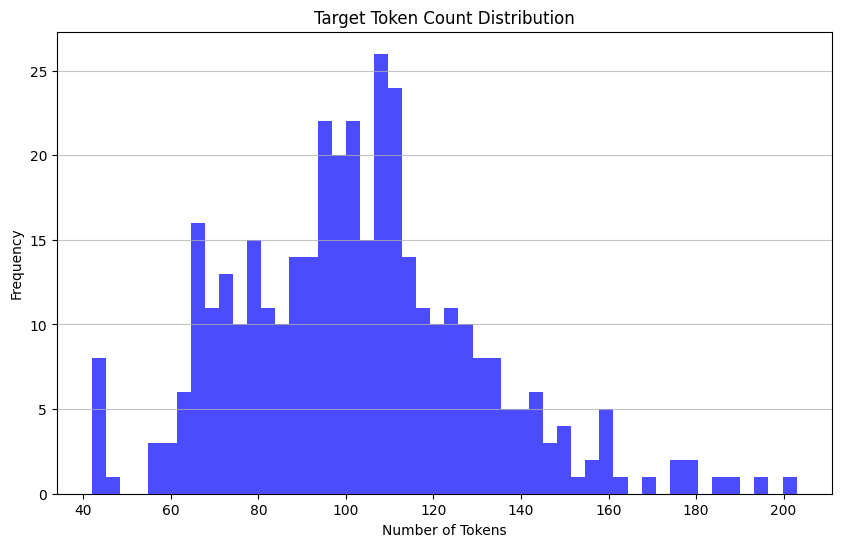

In [19]:
# targetのトークン数分布を確認
def count_target_tokens(data: GradeExplanationDataset) -> Dict[str, int]:
    target_token_counts = {}
    for item in data:
        target = item["target"]
        if isinstance(target, str):
            tokens = tokenizer.encode(target, add_special_tokens=False)
            target_token_counts[item["userid"]] = len(tokens)
    return target_token_counts


target_token_counts = count_target_tokens(data)
# トークン数の分布を表示
import matplotlib.pyplot as plt


def plot_token_distribution(token_counts: Dict[str, int]) -> None:
    plt.figure(figsize=(10, 6))
    plt.hist(list(token_counts.values()), bins=50, color="blue", alpha=0.7)
    plt.title("Target Token Count Distribution")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Frequency")
    plt.grid(axis="y", alpha=0.75)
    plt.show()


plot_token_distribution(target_token_counts)